In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

from sqlalchemy import create_engine


import warnings
warnings.filterwarnings(action="ignore")


postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

In [2]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

heartdisease_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize y so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0,1, 0)


# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

1. Apply GMM to the heart disease dataset by setting n_components=2. Get ARI and silhouette scores for your solution and compare it with those of the k-means and hierarchical clustering solutions that you implemented in the previous lesson assessments. Which algorithm performs best?

In [4]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

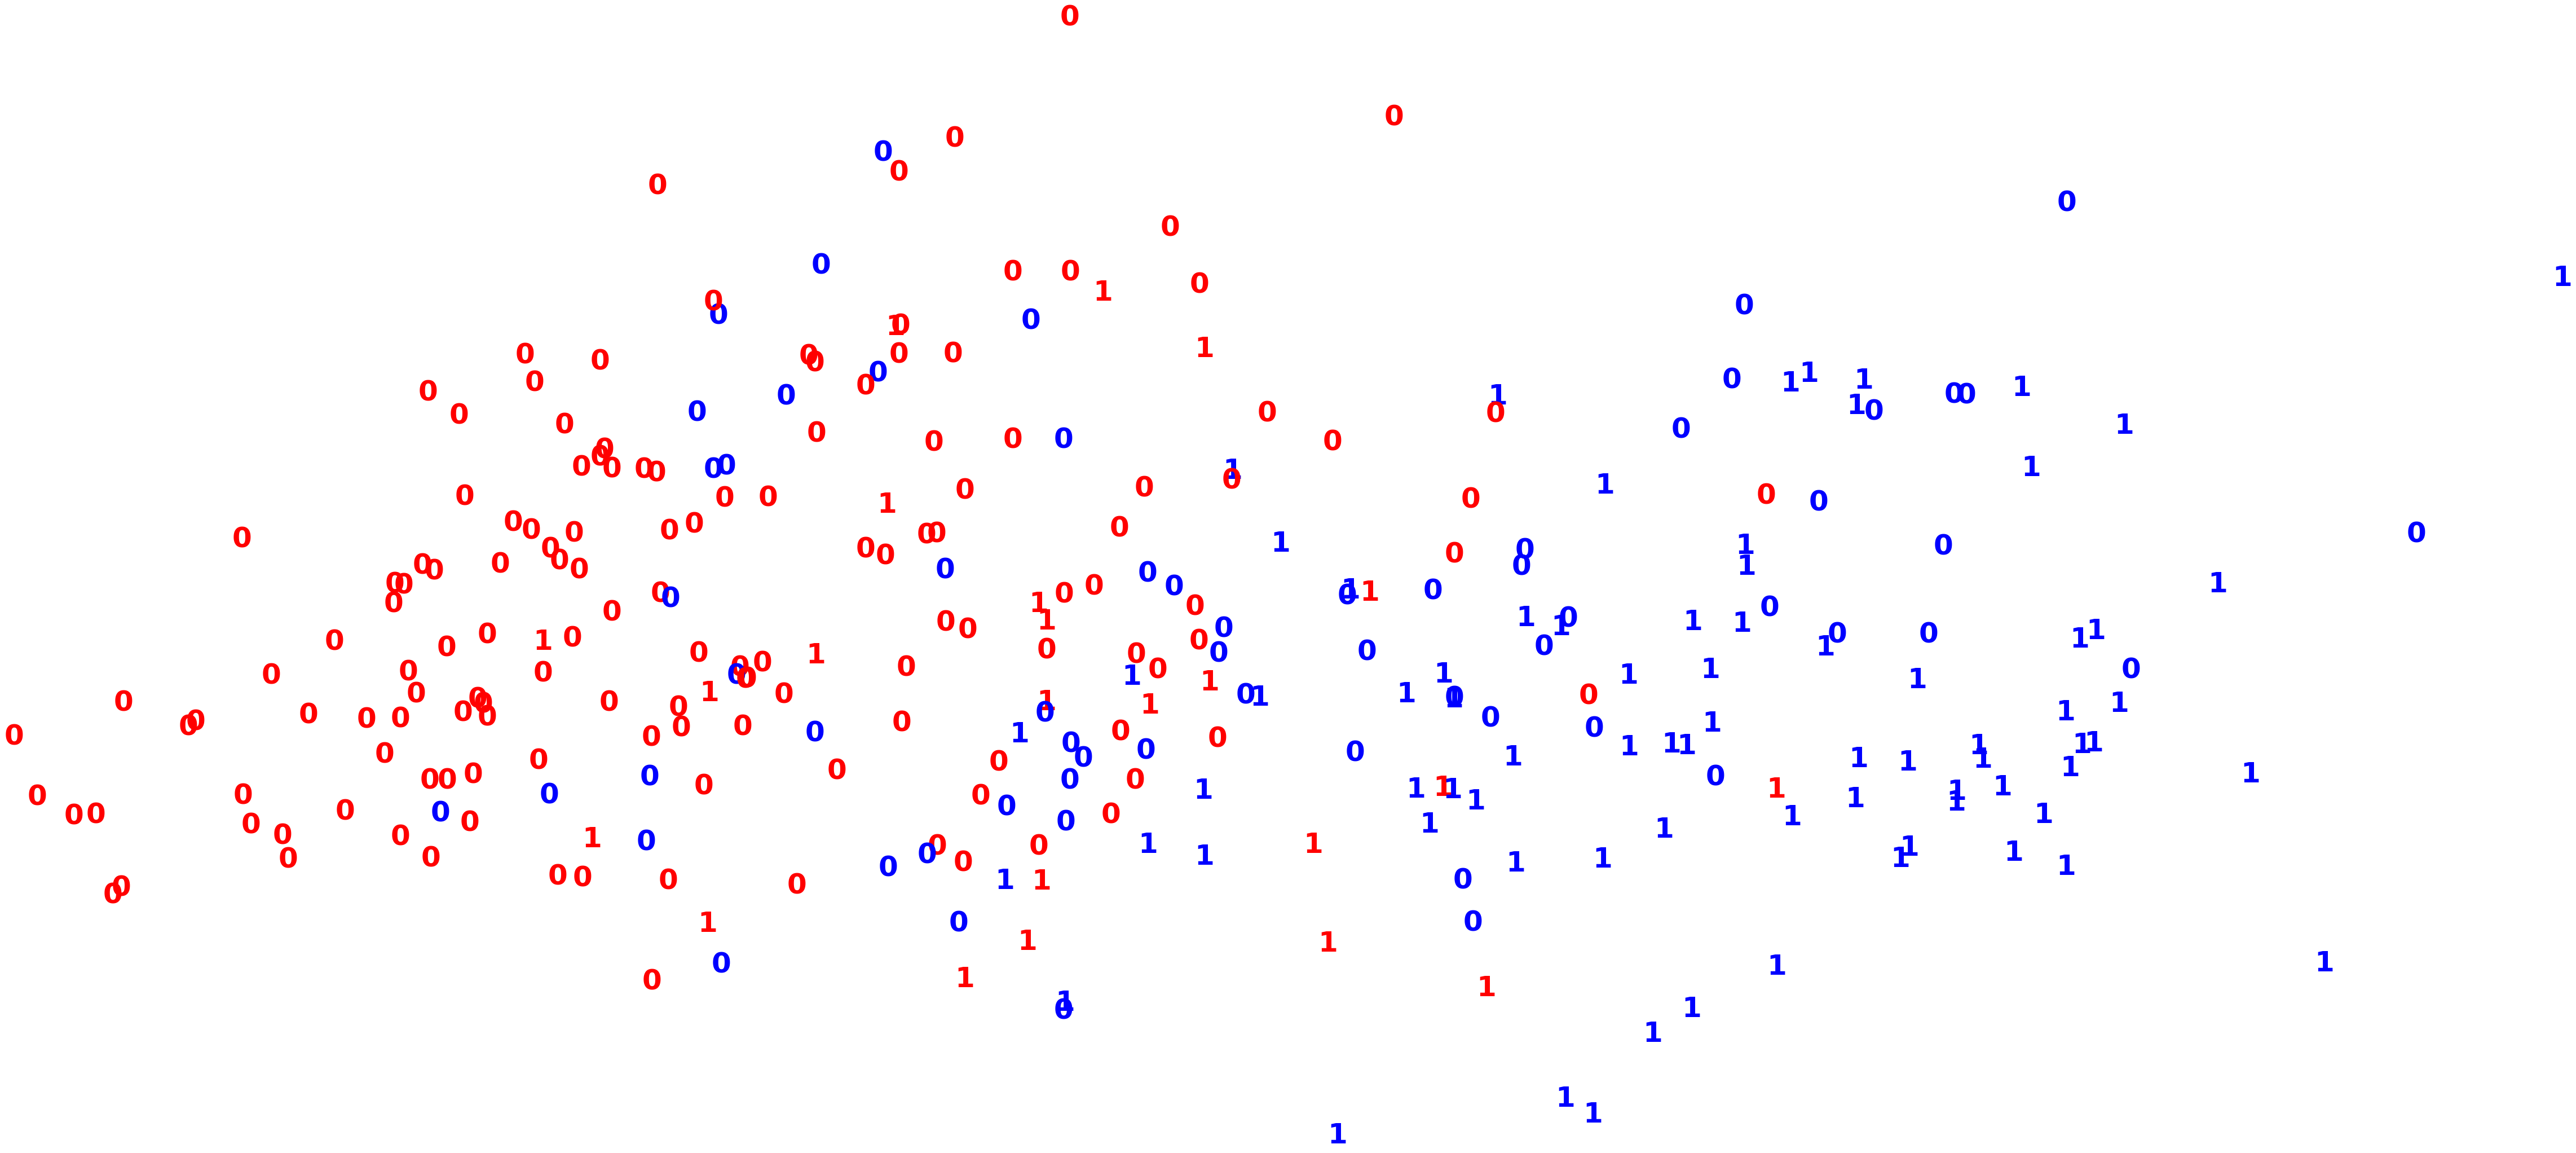

In [5]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [6]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.18389186035089963
The silhouette score of the GMM solution: 0.13628813153331445


For the most part both scores are lower than the k-means and hierarchical clustering solutions. The k-means is still the best solution. 

2. GMM implementation of scikit-learn has a parameter called covariance_type. This parameter determines the type of covariance parameters to use. There are four types that you can specify:
    1. full: This is the default. Each component has its own general covariance matrix.
    2. tied: All components share the same general covariance matrix.
    3. diag: Each component has its own diagonal covariance matrix.
    4. spherical: Each component has its own single variance.
Try all. Which one performs best in terms of ARI and silhouette scores?

In [9]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, covariance_type='full', random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("Adjusted Rand Index of the GMM (full) solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the GMM (full) solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("-----------------")



# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, covariance_type='tied', random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("Adjusted Rand Index of the GMM (tied) solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the GMM (tied) solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("-----------------")



# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, covariance_type='diag', random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("Adjusted Rand Index of the GMM (diag) solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the GMM (diag) solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("-----------------")



# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, covariance_type='spherical', random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("Adjusted Rand Index of the GMM (spherical) solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the GMM (spherical) solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("-----------------")

Adjusted Rand Index of the GMM (full) solution: 0.08917329098922656
The silhouette score of the GMM (full) solution: 0.08182877824438428
-----------------
Adjusted Rand Index of the GMM (tied) solution: 0.1010541323771832
The silhouette score of the GMM (tied) solution: 0.11077416577119975
-----------------
Adjusted Rand Index of the GMM (diag) solution: 0.08585853990236307
The silhouette score of the GMM (diag) solution: 0.08441772424682074
-----------------
Adjusted Rand Index of the GMM (spherical) solution: 0.24059227951411136
The silhouette score of the GMM (spherical) solution: 0.09221056854625728
-----------------


Spherical has the highest ARI score adn tied has the highest silhouette score.   